## **Laboratorio 15: Solución de un problema de clasificación**
**Facultad de ingeniería, departamento de Ingeniería Biomédica, Universidad de los Andes**\
**IBIO-2340 Fundamentos del machine learning**

 **Nombres de los integrantes**


1.   John Anderson Acosta
2.   Nombre integrante 2

**Número del grupo**

*Grupo 02*

# **Introducción**

En esta práctica se busca aplicar los conceptos de aprendizaje supervisado para resolver un problema de clasificación binaria a través de la regresión logística. En particular, veremos las herramientas disponibles para realizar los siguientes pasos:

- Preprocesamiento de los datos
- Partición del conjunto de datos
- Selección de hiperparámetros
- Entrenamiento del modelo
- Evaluación del modelo

# **Guía para solucionar un problema de clasificación**

Como ejemplo, se usarán los datos de cáncer de seno del laboratorio anterior para crear una guía para atacar un problema de clasificación desde cero usando herramientas en librerías de Python para realizarlo de forma automática.

# Preprocesamiento de los datos
Primero, es necesario estandarizar los datos para que las características queden en los mismos órdenes de magnitud. Para esto, se pueden usar algunas funciones de la librería `sklearn`:

- **StandardScaler:** Hace que la **media** sea igual a 0 y escala los datos a la varianza unitaria (1). Los datos quedan en un rango que aproximadamente varía entre -1 y 1.
- **MinMaxScaler:** escala todas las características de datos en el rango [0, 1] o en el rango [-1, 1] si hay valores negativos en el conjunto de datos.


En este caso, se usará `StandardScaler`, donde la forma de usarla es la siguiente:

```
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
```

Aquí, $X$ es el arreglo de observaciones.

[Text(0.5, 1.0, 'Standardized'),
 Text(0.5, 0, 'Feature 1'),
 Text(0, 0.5, 'Feature 2')]

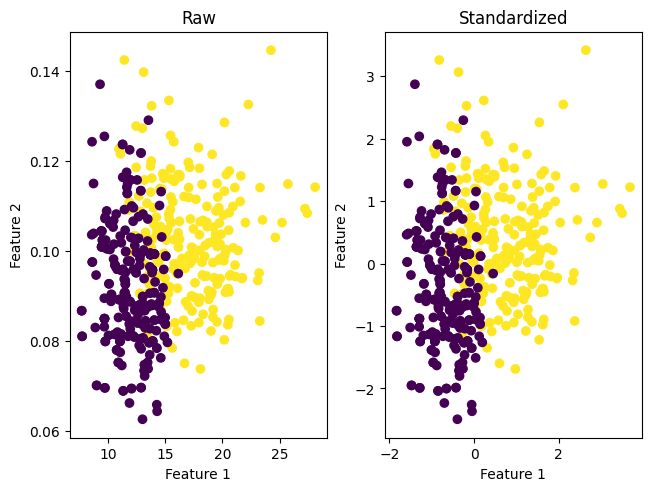

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('Breast_Cancer_Train.csv') # Importar los datos del archivo CSV
X = df.drop(['pronostic'], axis = 1).to_numpy() # Extracción del arreglo de observaciones
y = df['pronostic'].to_numpy() # Extracción del arreglo de etiquetas

def scalerFun(X):
  scaler = StandardScaler() # Creación del escalador
  X_scaled = scaler.fit_transform(X) # Estandarización
  return X_scaled
X_new = scalerFun(X)

fig, ax = plt.subplots(1,2, layout = 'constrained')
ax[0].scatter(X[:,0],X[:,1],c=y)
ax[0].set(title = 'Raw',xlabel = 'Feature 1', ylabel = 'Feature 2')

ax[1].scatter(X_new[:,0],X_new[:,1],c=y)
ax[1].set(title = 'Standardized',xlabel = 'Feature 1', ylabel = 'Feature 2')


# Partición de los datos

Este conjunto de datos contiene 469 observaciones. Depende de cada investigador asignar el porcentaje de entrenamiento y de prueba. Para dividir los datos, se usa la función `train_test_split` de la librería `sklearn.model_selection`, la cual recibe las observaciones y sus respectivas etiquetas, además del porcentaje de prueba, y devuelve los datos particionados de forma aleatoria. En este caso se usará 75\% de los datos para entrenamiento y el 15\% para prueba. Aquí, asignarle un número fijo a `random_state` nos asegura que la partición aleatoria sea la misma en cada corrida de esta rutina.

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_new,y,test_size=0.15,random_state = 42) # División del set de datos con 42 veces de reordenamiento

# **Selección de hiperparámetros**

La sintonización de los hiperparámetros es fundamental debido a que potencialmente puede convertir un modelo con un terrible desempeño en uno excelente. Esto se logra al probar todas las posibles combinaciones para diversos valores de hiperparámetros. En este caso, se usa la función `GridSearchCV` de la librería `sklearn.model_selection`, la cual realiza una sintonización usando una validación cruzada sobre los datos de la partición de entrenamiento. Ésta recibe el modelo a sintonizar, los datos de la partición de entrenamiento, el conjunto de posibles valores para los hiperparámetros, y la cantidad de *folds* o particiones $K$. El modelo, el cual es de regresión logística, se define de la siguiente forma::
```
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter = 'número de iteraciones máximas')
```
Es importante modificar el número de iteraciones máximas para evitar problemas de covergencia y mejorar el desempeño de la sintonización. Por otro lado, los valores para los hiperparámetros se deben definir en un conjunto de la siguiente forma:

```
parameter_space = {'solver': ['solver_1','solver_2',...,'solver_n'], 'C': [C_1,C_2, ..., C_m] }
```
Hay que notar que este conjunto varía de acuerdo al modelo de clasificación, por lo que es necesario leer la documentación de cada modelo. En este caso, como se trata de regresión logística, sólo se puede variar el método de búsqueda para resolver el problema de optimización (usualmente es llamado *solver*) y la constante se regularización. Es importante aclarar que esta función usa el inverso del parámetro $c$ visto en clase. Es decir, usa $\frac{1}{C}$ para sintonizar. Los solvers 'lbfgs', 'liblinear', 'newton-cg' son variaciones de los métodos de descenso de gradiente y Newton vistos en clase. Para este caso, se usaron los siguientes posibles hiperparámetros:
```
'solver': ['lbfgs','liblinear','newton-cg']
'C': np.linspace(1/1000,1,100)
```
Esto quiere decir que se van a probar de forma automática diferentes combinaciones de métodos de optimización y el parámetro de regularización. Luego, la función de `GridSearchCV`, con $K=3$, se usaría de la siguiente forma:

```
clf = GridSearchCV(model, parameter_space, cv = 3)
clf.fit(X_train, y_train)
```

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

model = LogisticRegression(max_iter=100000) # Creación del modelo de regresión logística
parameter_space = {'solver': ['lbfgs','liblinear','newton-cg'], 'C': np.linspace(1/1000,1,100) } # Creación del conjunto de parámetros
clf = GridSearchCV(model, parameter_space, cv = 3) # Creador de la grilla
clf.fit(X_train, y_train) # Aplicación de Grid Search en los datos de entramiento

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=100000),
             param_grid={'C': array([0.001     , 0.01109091, 0.02118182, 0.03127273, 0.04136364,
       0.05145455, 0.06154545, 0.07163636, 0.08172727, 0.09181818,
       0.10190909, 0.112     , 0.12209091, 0.13218182, 0.14227273,
       0.15236364, 0.16245455, 0.17254545, 0.18263636, 0.19272727,
       0.20281818, 0.21290909, 0.223     , 0.23309091, 0.24318182,
       0.2...
       0.70736364, 0.71745455, 0.72754545, 0.73763636, 0.74772727,
       0.75781818, 0.76790909, 0.778     , 0.78809091, 0.79818182,
       0.80827273, 0.81836364, 0.82845455, 0.83854545, 0.84863636,
       0.85872727, 0.86881818, 0.87890909, 0.889     , 0.89909091,
       0.90918182, 0.91927273, 0.92936364, 0.93945455, 0.94954545,
       0.95963636, 0.96972727, 0.97981818, 0.98990909, 1.        ]),
                         'solver': ['lbfgs', 'liblinear', 'newton-cg']})

Posteriormente, se deben revisar los resultados de sintonización. Para esto, se obtiene la mejor combinación de hiperparámetros así:

```
clf.best_params_
```
También, este tiene diferentes métricas como, por ejemplo, la precisión (accuracy). La forma de obtenerla es:

```
clf.cv_results_['mean_test_score']
```

Una forma útil de revisar las mejores combinaciones de los hiperparámetros y el respectivo accuracy es através de la librería `seaborn`. La forma de hacelo sería la siguiente:


```
import seaborn as sns
hyperpar = clf.cv_results_['params']
Model = pd.DataFrame(hyperpar)
Model['Accuracy'] = clf.cv_results_['mean_test_score']
Model["Parameters"] =   Model["solver"] + ' ' + Model['C'].apply(str)
sns.scatterplot(data=Model, x=Model.index, y="Accuracy", hue="Parameters", s=40).set(title='Accuracy of the Different Models | Grid Search')
```




Best parameters found:
 {'C': 0.5660909090909091, 'solver': 'liblinear'}


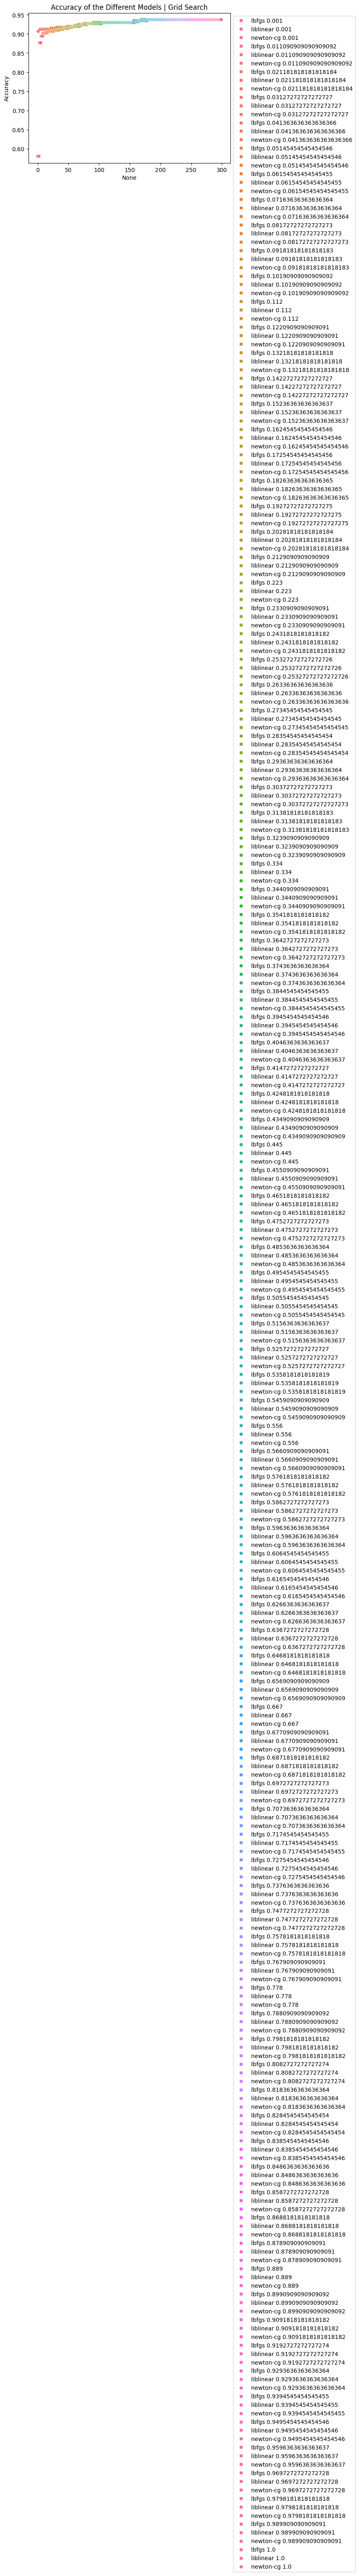

In [7]:
import seaborn as sns
print('Best parameters found:\n', clf.best_params_)


hyperpar = clf.cv_results_['params'] # Obtención de los hiperparámetros sintonizados

Model = pd.DataFrame(hyperpar) # Conversión de los resultados en un dataframe

means = clf.cv_results_['mean_test_score'] # Obtención de resultados del score

Model['Accuracy'] = means # Asignación de los resultados del score

Model["Parameters"] = Model["solver"] + ' ' + Model['C'].apply(str) # Aignación de las leyendas para cada combinación

sns.scatterplot(data=Model, x=Model.index, y="Accuracy", hue="Parameters", s=40).set(title='Accuracy of the Different Models | Grid Search') # Creación del gráfico
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

En este caso, la mejor combinación fue de $C=0.566$ con solucionador *liblinear*. Para alcanzar un accuracy cercana a $0.94$ de la validación cruzada. Este solucionador es una versión modificada del método de Newton ya implementado anteriormente.




# **Entrenamiento del modelo**

Ahora, ya teniendo los mejores hiperparámetros del modelo mediante la validación cruzada, podemos entrenamer el modelo de la misma manera que en el laboratorio anterior:
```
model = LogisticRegression(max_iter = 1000, C = 0.566, solver = 'liblinear')
model.fit(X_train,y_train)
```
donde se deben incluir los parámetros sintonizados. La predicción de las etiquetas de los datos de prueba se obtienen de la siguiente forma:

```
model.predict(X_test)
```

Luego, para obtener los coeficientes $w$ y el intercepto $b$ sería:

```
w = model.coef_.flatten()
b = model.intercept_
```

En este caso, como tenemos dos características, podemos hacer una inspección visual de la recta separadora. Esto no lo podemos hacer cuando tenemos más de dos características:



[Text(0.5, 0, 'Feature 1'), Text(0, 0.5, 'Feature 2')]

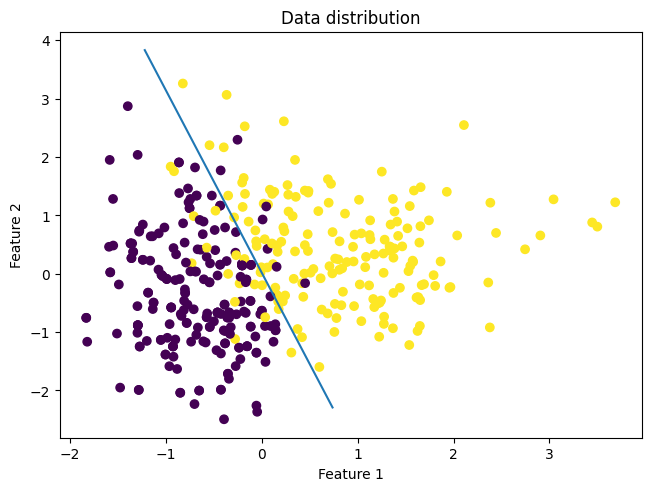

In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix,recall_score,precision_score,f1_score, confusion_matrix

model = LogisticRegression(max_iter = 10000, C = 0.566, solver = 'liblinear') # Creación del modelo con los hiperparámetros sintonizados

model.fit(X_train,y_train) # Entrenamiento del modelo

w = model.coef_.flatten() # Obtención de los coeficientes

b = model.intercept_ # Obtención del intercepto

# Gráfico del resultado
fig , ax= plt.subplots(layout='constrained')
x1 = np.linspace(min(X_train[:,0])/1.5,max(X_train[:,0])/5,10)
x2 = -(b+w[0]*x1)/w[1]
ax.scatter(X_train[:,0],X_train[:,1],c=y_train)
ax.plot(x1,x2)
ax.set_title('Data distribution')
ax.set(xlabel='Feature 1', ylabel = 'Feature 2')

# **Evaluación del modelo**

Una vez entrenado el clasificador, es necesario evaluar su desempeño con los datos de prueba. Para esto se pueden usar métricas dadas por la misma librería `sklearn.metrics`, tales como:

- `accuracy_score`: Calcula el porcentaje de aciertos.
- `confusion_matrix`: Muestra la siguiente matriz:
\begin{align*}
  \begin{bmatrix}
    TN & FP \\
    FN & TP
  \end{bmatrix}
\end{align*}

Donde


> $TN$ son los datos con clase $0$ clasificados como clase $0$

> $FP$ son los datos con clase $0$ clasificados como clase $1$

> $FN$ son los datos con clase $1$ clasificados como clase $0$

> $TP$ son los datos con clase $1$ clasificados como clase $1$


Las predicciones con los datos de prueba se obtienen como:

```
y_pred = model.predict(X_test)
```


Luego, cada métrica se usa de la siguiente forma:

```
accuracy_score(y_test,ypred)
confusion_matrix(y_test,ypred)
```


In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix

ypred = model.predict(X_test) # Predicción de las clases

print(f'Accuracy Score :  {accuracy_score(y_test,ypred)}') # Score de Accuracy
print(f'Confusion matrix: \n{(confusion_matrix(y_test,ypred))}') # Confusion matrix

Accuracy Score :  0.8309859154929577
Confusion matrix: 
[[33  3]
 [ 9 26]]


# **Ejercicio**

Una empresa desea determinar la calidad de vino rojo en un proceso automatizado. Para eso, se miden las siguientes 11 variables en el líquido que se consideran dan información sobre la calidad de un vino:  acidez fija, acidez volátil, acides cítrica, azúcar residual, nivel de cloruro, dióxido de sulfuro libro, dióxido de sulfuro total, densidad, pH, sulfatos, y alcohol. La base de datos *wine_quality.csv* contiene observaciones etiquetadas donde $0$ indica que el vino no es de calidad, y $1$ de lo contrario. Usando las herramientas que ofrece la librería `sklearn`, encuentre un clasificador lineal preciso obtenido a través de una regresión logística que determine de forma automática si la calidad de un vino es buena o mala basada en las 11 características de una muestra. Con esto, se espera que se sigan todos los pasos mostrados, analizando cada resultado y explicando cada herramienta que se use.



In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, auc
import matplotlib.pyplot as plt

#Cargar los datos
wine_df = pd.read_csv("wine_quality.csv")
print(wine_df)
# Separar las caractersiticas de las columnas
X = wine_df.drop('quality', axis=1)
y = wine_df['quality']

# Estandarizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               6.9              0.40         0.42             6.2      0.066   
1               7.1              0.43         0.61            11.8      0.045   
2               9.2              0.19         0.42             2.0      0.047   
3               6.9              0.21         0.49             1.4      0.041   
4               7.8              0.56         0.19             2.1      0.081   
...             ...               ...          ...             ...        ...   
3995            7.6              0.20         0.30            14.2      0.056   
3996            7.1              0.14         0.33             1.0      0.104   
3997            6.2              0.21         0.34             6.6      0.030   
3998            6.8              0.22         0.29             8.9      0.046   
3999            6.4              0.28         0.29             1.6      0.052   

      free sulfur dioxide  

**Partición del Dataset**

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=45)
#En este caso asigne 20% de los datos para validar y 45 particiones

**Seleccion de los hiperpramatros**

In [8]:
#Modelo de regresion logistica

model = LogisticRegression(max_iter=1000000)

# Definir los hiperparametros :)
parameter_space = {'solver': ['lbfgs', 'liblinear', 'newton-cg'], 'C': np.linspace(1/1000, 1, 100)}

# Usar GridsearchCV para buscar diferentes metodos de optimización y el parametro de regularacion con un K=4
clf = GridSearchCV(model, parameter_space, cv=4)

clf.fit(X_train, y_train)


GridSearchCV(cv=4, estimator=LogisticRegression(max_iter=1000000),
             param_grid={'C': array([0.001     , 0.01109091, 0.02118182, 0.03127273, 0.04136364,
       0.05145455, 0.06154545, 0.07163636, 0.08172727, 0.09181818,
       0.10190909, 0.112     , 0.12209091, 0.13218182, 0.14227273,
       0.15236364, 0.16245455, 0.17254545, 0.18263636, 0.19272727,
       0.20281818, 0.21290909, 0.223     , 0.23309091, 0.24318182,
       0....
       0.70736364, 0.71745455, 0.72754545, 0.73763636, 0.74772727,
       0.75781818, 0.76790909, 0.778     , 0.78809091, 0.79818182,
       0.80827273, 0.81836364, 0.82845455, 0.83854545, 0.84863636,
       0.85872727, 0.86881818, 0.87890909, 0.889     , 0.89909091,
       0.90918182, 0.91927273, 0.92936364, 0.93945455, 0.94954545,
       0.95963636, 0.96972727, 0.97981818, 0.98990909, 1.        ]),
                         'solver': ['lbfgs', 'liblinear', 'newton-cg']})

Best parameters found:
 {'C': 0.26336363636363636, 'solver': 'lbfgs'}


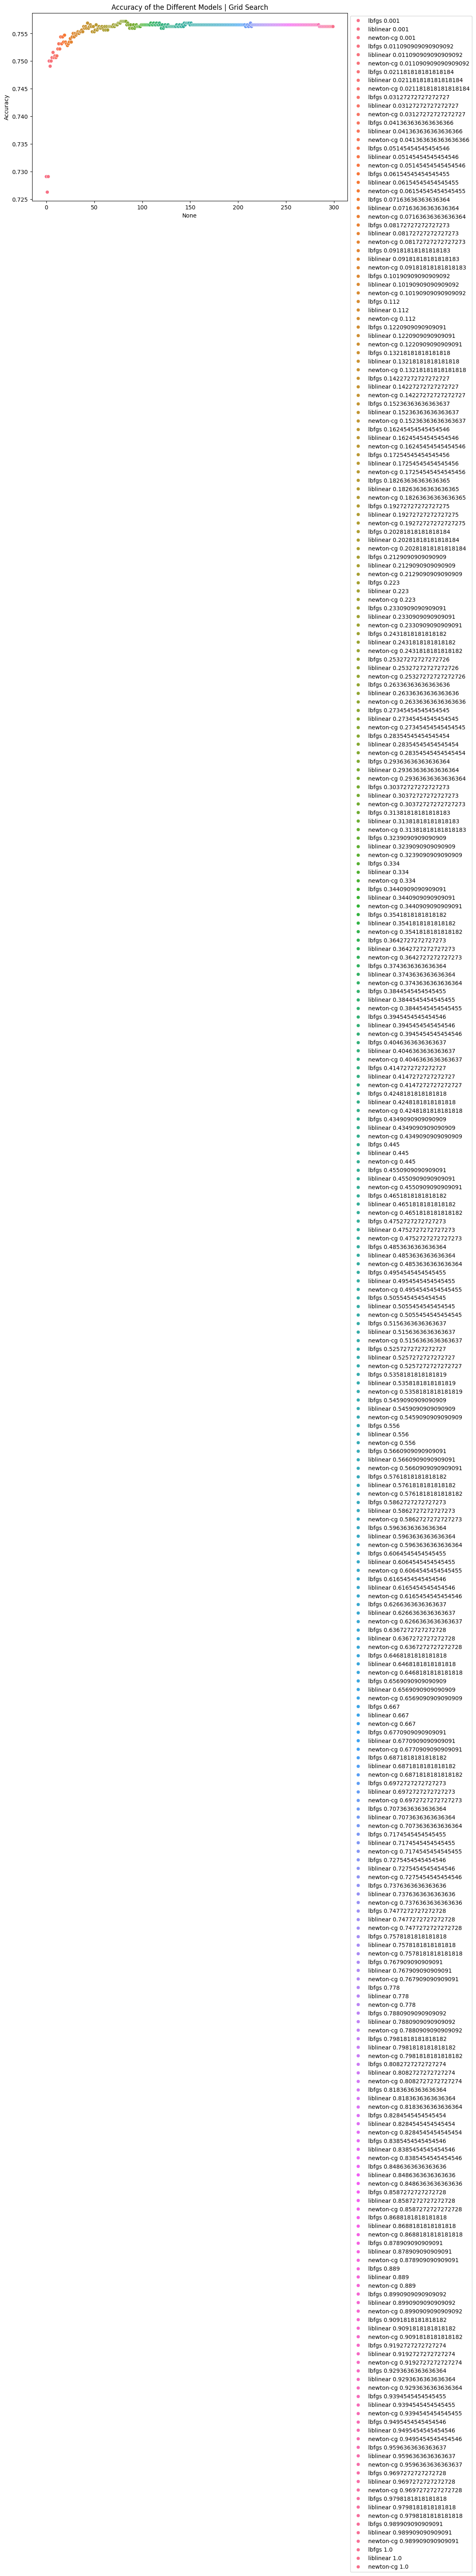

In [13]:
best_params = clf.best_params_
print('Best parameters found:\n', best_params)

# Get the mean test scores for each parameter combination
mean_test_scores = clf.cv_results_['mean_test_score']

# Create a DataFrame to store the hyperparameters and their corresponding mean test scores
hyperpar = clf.cv_results_['params']
Model = pd.DataFrame(hyperpar)
Model['Accuracy'] = mean_test_scores
Model["Parameters"] = Model["solver"] + ' ' + Model['C'].apply(str)

# Plot the results using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=Model, x=Model.index, y="Accuracy", hue="Parameters", s=40)
plt.title('Accuracy of the Different Models | Grid Search')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

La mejor combinacion C = 0.26 **Entrenamiento del modelo**

In [14]:
# Definir la regresion logistica con el hiperparametros
model = LogisticRegression(max_iter=1000000, C=best_params['C'], solver=best_params['solver'])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

w = model.coef_.flatten()
b = model.intercept_
print(f'Coefficients: {w}')
print(f'Intercept: {b}')

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC: {roc_auc}')



Coefficients: [ 0.25548177 -1.17719095  0.01783681  0.91045794 -0.17794331  0.01025827
  0.32408222 -1.10826641  0.29495548  0.20866932  0.57266221]
Intercept: [-0.25568085]
Accuracy: 0.7675
Precision: 0.7397260273972602
Recall: 0.8181818181818182
F1 Score: 0.776978417266187
ROC AUC: 0.8599172417241725


In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score


y_pred = model.predict(X_test)

# Calcular precicsion
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy Score: {accuracy}')

# Calcular confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

# Calcular
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


tn, fp, fn, tp = conf_matrix.ravel()
print(f'TN (True Negative): {tn}')
print(f'FP (False Positive): {fp}')
print(f'FN (False Negative): {fn}')
print(f'TP (True Positive): {tp}')


Accuracy Score: 0.7675
Confusion Matrix:
[[290 114]
 [ 72 324]]
Precision: 0.7397260273972602
Recall: 0.8181818181818182
F1 Score: 0.776978417266187
TN (True Negative): 290
FP (False Positive): 114
FN (False Negative): 72
TP (True Positive): 324


**Archivo CSV**

In [16]:
model_params = np.append(w, b)

# Creacion del CSV
output_df = pd.DataFrame([model_params], columns=[f'w{i+1}' for i in range(len(w))] + ['b'])
output_df.to_csv('model_parameters.csv', index=False)

print("Model parameters saved to model_parameters.csv")

Model parameters saved to model_parameters.csv


# Entregable

Se debe entregar este notebook con el ejercicio solucionado resolviendo el problema de clasificación de vinos, y un archivo .csv que incluya el vector de coeficientes $w$ y el intercepto $b$, todo en una misma fila, donde las primeras 11 columnas corresponden a los coeficientes $w_i$ y la última columna (12) corresponde al intercepto $b$. Este clasificador entrenado será evaluado en otro conjunto de observaciones de vinos desconocido para los estudiantes.